# Sosyal Ag Analizi III - Algoritmik Yaklasim 

> Bu calisma Uzay Cetin tarafindan, Uskudar Amerikan Lisesi CodeFest 2018 (https://www.codefesttr.org) icin hazirlanmistir. 

NetworkX version: 2.0 gereklidir.

---

Su sorulara cevap vermek istiyoruz

 - Networkte bir mesajin/virusun yayilmasi ne kadar surer?
 - A'dan B'ye en kisa yol nedir?
 
## Breadth First Search Algoritmasi
 
<video controls src="https://algs4.cs.princeton.edu/lectures/41DemoBreadthFirstSearch.mov" />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

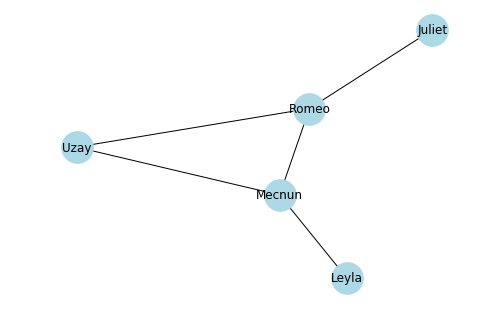

In [2]:
G = nx.Graph() # empty graph
G.add_edge("Leyla","Mecnun")
G.add_edge("Juliet","Romeo")
G.add_edge("Uzay","Mecnun")
G.add_edge("Uzay","Romeo")
G.add_edge("Romeo","Mecnun")

nx.draw(G, node_size=1000, node_color='lightblue', with_labels=True)

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 5
Average degree:   2.0000


In [4]:
from queue import *

def BFS(bas, G):
    goruldu = set()
    nerden_geldim = dict()
    kuyruk = Queue()
    kuyruk.put(bas)
    
    while not kuyruk.empty():
        orta = kuyruk.get()
        goruldu.add(orta)
        komsular = list(G.neighbors(orta))
        
        for n in komsular:
            if n not in goruldu:
                kuyruk.put(n)   
                nerden_geldim[n] = orta
    return nerden_geldim

## Sorular

 - Leyla'dan Juliet'e yol var mi?
 - Yolu yazar misiniz?

In [5]:
nerden_geldim = BFS('Leyla', G)
nerden_geldim

{'Juliet': 'Romeo', 'Mecnun': 'Leyla', 'Romeo': 'Uzay', 'Uzay': 'Mecnun'}

In [6]:
# 'Mecnun'a 'Leyla'dan geldim
nerden_geldim['Mecnun']

'Leyla'

In [7]:
for u, w in nerden_geldim.items():
    print(w, "->", u)

Leyla -> Mecnun
Mecnun -> Uzay
Uzay -> Romeo
Romeo -> Juliet


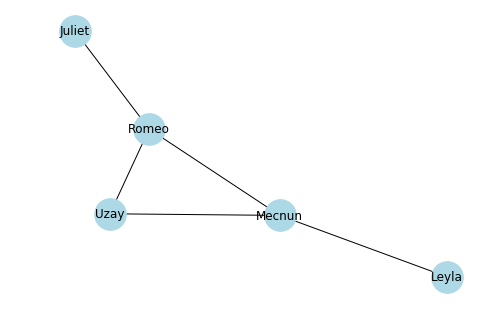

In [8]:
nx.draw(G, node_size=1000, node_color='lightblue', with_labels=True)

In [9]:
# 'Leyla'dan, 'Juliet'e yol var mi anlamak icin
# 'Juliet'ten baslayip geri geri gidiyoruz, 'Leyla'yi bulana kadar

n = 'Juliet'
yol = [n]
while n != 'Leyla':
    n = nerden_geldim[n]
    yol.append(n)
    print(n)

Romeo
Uzay
Mecnun
Leyla


In [13]:
yol.reverse()
yol

AttributeError: 'function' object has no attribute 'reverse'

In [11]:
def yol(G, bas, son):
    nerden_geldim = BFS(bas, G)
    n = son
    yol = [n]
    while n != bas:
        n = nerden_geldim[n]
        yol.append(n)
    yol.reverse
    return yol
yol(G, 'Mecnun', 'Juliet')

['Juliet', 'Romeo', 'Uzay', 'Mecnun']